In [3]:
### 1. K-fold 교차검증
from sklearn import datasets, metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 숫자 데이터셋을 로드
digits=datasets.load_digits()

# 특성 행렬
features, target=digits.data, digits.target

# 표준화 객체
standardizer=StandardScaler()

# 로지스틱 회귀 객체
logit=LogisticRegression()

# 표준화한 다음 로지스틱 회귀를 실행하는 파이프라인
pipeline=make_pipeline(standardizer, logit)

# K-fold 교차검증
kf=KFold(n_splits=10, shuffle=True, random_state=1)

# K-fold 교차검증을 수행
cv_results=cross_val_score(pipeline, features, target, cv=kf, scoring='accuracy', n_jobs=-1)

# 평균을 계산
cv_results.mean()

0.9693916821849783

In [4]:
### 2. ShuffleSplit : 반복횟수에 관계없이 학습용, 검증용 데이터셋을 임의로 지정할 수 있음
# 반복마다 랜덤하게 분할하므로 하나의 샘플이 여러번 포함될 수 있음
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit 분할기(학습용 50%, 검증용 20%)
ss=ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.2, random_state=42)

# 교차검증을 수행
cv_results=cross_val_score(pipeline, features, target, cv=ss, scoring='accuracy', n_jobs=-1)

# 평균을 계산
cv_results.mean()

0.9630555555555554

In [5]:
### 3. RepeatedKFold 교차검증
from sklearn.model_selection import RepeatedKFold

# RepeatedKFold 분할기(10회 교차검증을 5회 반복)
rk=RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# 교차검증을 수행
cv_results=cross_val_score(pipeline, features, target, cv=rk, scoring='accuracy', n_jobs=-1)

# 검증 점수 개수를 확인
print(len(cv_results))
# 평균을 계산
print(cv_results.mean())

50
0.9695065176908755


In [2]:
### 4. 회귀 모형의 교차 검증
# 더미 회귀 모델 만들기
# 다른 모델과 비교하기 위해 성능이 떨어지는 더미 회귀 모형을 만드는 방법

from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# 데이터를 로드
boston=load_boston()

# 특성
features, target=boston.data, boston.target

features_train, features_test, target_train, target_test=train_test_split(features, target, random_state=0)

# 더미 회귀 모델 모든 출력값을 샘플들의 평균값으로 분류하는 더미 모형
dummy=DummyRegressor(strategy='mean')

# 더미 회귀 모델을 훈련
dummy.fit(features_train, target_train)

# R^2 점수를 계산
dummy.score(features_test, target_test)

-0.001119359203955339

In [3]:
from sklearn.linear_model import LinearRegression

# 간단한 선형 회귀 모델을 훈련
ols=LinearRegression()
ols.fit(features_train, target_train)

# R^2 점수를 계산
ols.score(features_test, target_test)

0.6354638433202128

In [4]:
# 모든 샘플에 대해 20으로 예측하는 더미 회귀 모델
clf=DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)

# R^2 점수를 계산
clf.score(features_test, target_test)

-0.06510502029325727

In [5]:
# y값의 70%값으로 출력
clf=DummyRegressor(strategy='quantile', quantile=0.7) # quantile : 10분위수
clf.fit(features_train, target_train)

# 학습용 데이터셋 타겟의 70%값으로 예측
clf.predict(features_test)

array([24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5])

In [6]:
import numpy as np

# 학습용 데이터셋의 타겟에서 최댓값을 확인
np.max(target_train)

50.0

In [7]:
### 5. 분류 모형의 검증
# 더미 분류 모형

from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# 데이터를 로드
iris=load_iris()

# 타겟 벡터와 특성 행렬
features, target=iris.data, iris.target
features_train, features_test, target_train, target_test=train_test_split(features, target, random_state=0)

# 더미 분류 모델(분류 결과를 50:50으로 분류하는 더미 모형)
dummy=DummyClassifier(strategy='uniform', random_state=1)

# 모델을 훈련
dummy.fit(features_train, target_train)

# 정확도 점수를 계산
dummy.score(features_test, target_test)

0.42105263157894735

In [8]:
from sklearn.ensemble import RandomForestClassifier

# 분류 모델
classifier=RandomForestClassifier()

# 모델을 훈련
classifier.fit(features_train, target_train)

# 정확도 점수를 계산
classifier.score(features_test, target_test)

0.9736842105263158

In [9]:
dummy=DummyClassifier(strategy='most_frequent')
dummy.fit(features_train, target_train)

# 학습용 데이터셋에서 가장 많은 값으로 예측
print(dummy.predict(features_test))

# 정확도 점수를 계산
print(dummy.score(features_test, target_test))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
0.23684210526315788


In [10]:
# 실제 학습용 데이터셋의 타겟 개수를 확인
np.bincount(target_train)

array([37, 34, 41], dtype=int64)

In [11]:
### 5.1 이진 분류기의 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 특성 행렬과 타겟 벡터
X, y=make_classification(n_samples=10000, n_features=3, n_redundant=0, n_classes=2, random_state=1)

# 로지스틱 회귀 모델
logit=LogisticRegression()

# 정확도를 사용하여 교차검증을 수행
cross_val_score(logit, X, y, scoring='accuracy')

array([0.863 , 0.8795, 0.8775, 0.88  , 0.8775])

In [12]:
# 정밀도를 사용하여 교차검증을 수행
cross_val_score(logit, X, y, scoring='precision')

array([0.87435633, 0.88934426, 0.88809035, 0.90189873, 0.88900308])

In [13]:
# 재현율을 사용하여 교차검증을 수행
cross_val_score(logit, X, y, scoring='recall')

array([0.84815185, 0.86713287, 0.86413586, 0.85329341, 0.86327345])

In [14]:
# f1 점수를 사용하여 교차검증을 수행
cross_val_score(logit, X, y, scoring='f1')

array([0.86105477, 0.87809813, 0.87594937, 0.87692308, 0.87594937])

In [15]:
from sklearn.model_selection import cross_validate

# 정확도, 정밀도, F1-score를 사용하여 교차검증을 수행
cross_validate(logit, X, y, scoring=['accuracy','precision','f1'])

{'fit_time': array([0.00797868, 0.00698113, 0.00797796, 0.00698113, 0.00797868]),
 'score_time': array([0.02094364, 0.00299287, 0.00199413, 0.00299263, 0.00199461]),
 'test_accuracy': array([0.863 , 0.8795, 0.8775, 0.88  , 0.8775]),
 'test_precision': array([0.87435633, 0.88934426, 0.88809035, 0.90189873, 0.88900308]),
 'test_f1': array([0.86105477, 0.87809813, 0.87594937, 0.87692308, 0.87594937])}

In [16]:
### 5.2 다중클래스 분류기 예측 평가하기
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 특성 행렬과 타겟 벡터
features, target=make_classification(n_samples=10000, n_features=3, n_informative=3,\
    n_redundant=0, n_classes=3, random_state=1)

# 로지스틱 회귀 모델
logit=LogisticRegression(max_iter=1000)

# 정확도를 사용하여 교차검증을 수행
cross_val_score(logit, features, target, scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [18]:
# 매크로 평균 F1 점수를 사용하여 교차검증을 수행
# 정밀도, 재현율, F1은 이진분류에 사용할 수 있음
# macro : 하나의 클래스만 있는 것처럼 각 클래스에서 측정한 값을 수집하여 평균한 값
#         각 클래스를 동등한 가중치로 클래스별 측정 점수를 평균화한 값
# weighted : 샘플 개수에 비례하여 각 클래스별 측정 점수를 평균한 값
# micro : 클래스별로 TP, TN, FP, FN을 모두 더하여 계산한 값
# cross_val_score(logit, features, target, scoring='recall')
# 에러가 발생함(이진분류에 사용 가능)

print(cross_val_score(logit, features, target, scoring='precision_macro'))
print(cross_val_score(logit, features, target, scoring='recall_macro'))
print(cross_val_score(logit, features, target, scoring='f1_macro'))

[0.84084737 0.82892836 0.82617407 0.81510466 0.81991138]
[0.84097366 0.82898341 0.82644282 0.81544078 0.81994306]
[0.84061272 0.82895312 0.82625661 0.81515121 0.81992692]


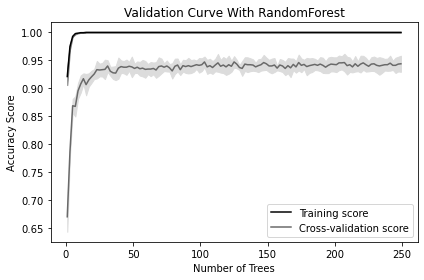

In [19]:
### 6. 하이퍼 파라미터 값의 영향을 시각화하기
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

# 데이터를 로드
digits=load_digits()

# 특성 행렬과 타겟 벡터
features, target=digits.data, digits.target

# 파라미터 값의 범위
param_range=np.arange(1, 250, 2)

# 파라미터 값의 범위를 사용하여 학습용 데이터셋과 검증용 데이터셋의 정확도를 계산
train_scores, test_scores=validation_curve(
    RandomForestClassifier(),
    features,
    target,
    param_name='n_estimators',
    param_range=param_range,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# 학습용 데이터셋 점수의 평균과 표준 편차를 계산
train_mean=np.mean(train_scores, axis=1)
train_std=np.std(train_scores, axis=1)

# 검증용 데이터셋 점수의 평균과 표준편차를 계산
test_mean=np.mean(test_scores, axis=1)
test_std=np.std(test_scores, axis=1)

# 학습용 데이터셋과 검증용 데이터셋의 평균 정확도 점수
plt.plot(param_range, train_mean, label='Training score', color='black')
plt.plot(param_range, test_mean, label='Cross-validation score', color='dimgrey')

# 학습용 데이터셋과 검증용 데이터셋의 정확도에 대한 표준편차 그래프
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color='gray')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color='gainsboro')

# 그래프를 출력
plt.title("Validation Curve With RandomForest")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()